Першa інтерполяційна формула : 
f(0.151) = 0.8599031176364222
f(0.223) = 0.8000249192094632
f(0.252) = 0.7772497905256229
Другa інтерполяційна формула : 
f(0.505) = 0.6034782120305062
f(0.554) = 0.574588382530314
f(0.457) = 0.6331470668976075


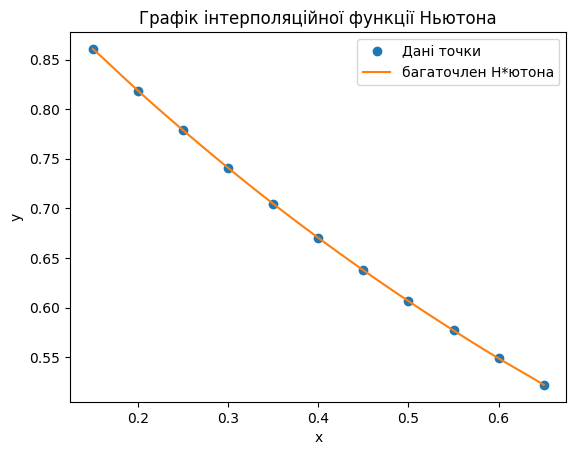

In [42]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
# задані точки
x = np.array ([0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65])
y = np.array([0.8607, 0.8187, 0.7788, 0.7408, 0.7046, 0.6703, 0.6376, 0.6065, 0.5769, 0.5488, 0.5220])
# перша інтерполяційна формула 
def first_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
    ans = 0
    for j in range(n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
        
    return ans

# друга інтерполяційна формула
def second_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
    ans = f[0, 0]
    for j in range(1, n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
    return ans

x1 = np.array([0.151, 0.223, 0.252])
x2 = np.array([0.505, 0.554, 0.457])
print("Першa інтерполяційна формула : ")
for i in range(len(x1)):
    y1 = first_interpolation(x, y, x1[i])
    print(f"f({x1[i]}) = {y1}")
print("Другa інтерполяційна формула : ")
for i in range(len(x2)):
    y2 = second_interpolation(x, y, x2[i])
    print(f"f({x2[i]}) = {y2}")

# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    yy[i] = second_interpolation(x, y, xx[i])
plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label='багаточлен Н*ютона')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()